# Lattice discrete levels for the interacting system

In [2]:
using Plots

A clear discussion on application of the L\"usher formalism is found in Ref. [Two Nucleons on a Lattice (Beane et al.)](https://arxiv.org/pdf/hep-lat/0312004.pdf).

Relation of the discrete lattice levels to the scattering phase in the L\"usher formalism,
$$
p\cot \delta(p) = \frac{1}{\pi L} S\left(\left(\frac{pL}{2\pi}\right)^2\right)
$$
Where $S(\eta)$ gives location of all of the energy eigenstates in the box
$$
S(\eta) = \sum_{j}^{|j|<\Lambda} \frac{1}{j^2-\eta} - 4\pi \Lambda
$$

In [3]:
S(η,Λmax=100) = sum(1.0/(i^2+j^2+k^2-η) for i=-Λmax:Λmax, j=-Λmax:Λmax, k=-Λmax:Λmax if i^2+j^2+k^2 < Λmax^2)-4π*Λmax;

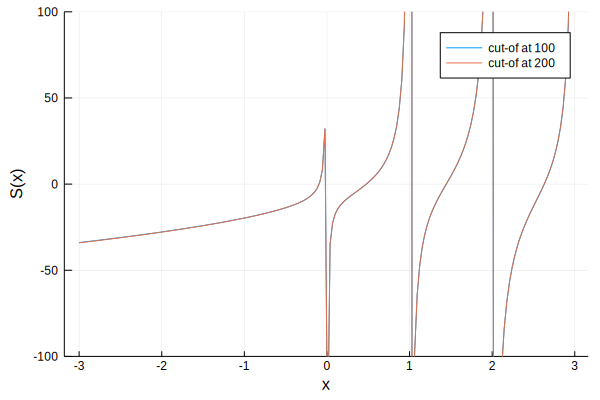

In [4]:
let ηval = -3:0.031:3
    cal = S.(ηval)
    plot(ηval, cal, ylim=(-100,100), lab="cut-of at 100", ylab="S(x)", xlab="x")
    #
    cal = S.(ηval, 200)
    plot!(ηval, cal, ylim=(-100,100), lab="cut-of at 200")

end

### Expression of the phase
$$
p \cot\delta(p) = \frac{1}{\pi L} S\left(\left(\frac{L p}{2\pi}\right)^2\right)
,\qquad\Rightarrow\quad
\delta(p) = \arctan\left(\frac{\pi L p}{S\left(\left(\frac{L p}{2\pi}\right)^2\right)} \right) + \pi n
$$
#### The scattering phase from a Breit-Wigner amplitude as an examole
$$
T = \frac{2}{\rho} \frac{1}{\cot\delta - i} = \frac{1}{1/K - i\rho/2},\qquad\Rightarrow\quad
\tan\delta = \frac{K\rho}{2}
$$

In [5]:
delta(p,L) = atan(π*L*p / S((L*p/(2π))^2) )
delta0(p,msq=3.5^2-0.1im) = -atan(reim(1im/(msq-p^2))...)

delta0 (generic function with 2 methods)

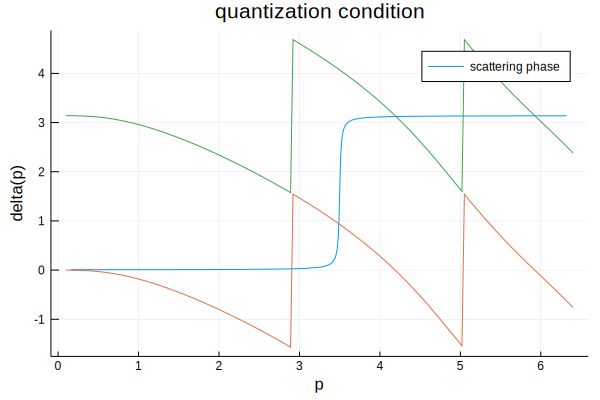

In [5]:
let L = 1.5, msq=3.5^2-0.1im
    pval = 0.1:0.03:6.4
    cal = delta.(pval,L)
    plot(title="quantization condition", xlab="p", ylab="delta(p)")
    plot!(p->delta0(p,msq), pval[1], pval[end], lab="scattering phase")
    #
    plot!(pval, cal, lab="")
    plot!(pval, cal .+ π, lab="")
end

#### Plot for presentations

In [15]:
div(5.1,π)

1.0

In [36]:
function align(v)
    shift=0
    vn = copy(v)
    for i in 2:length(v)
        if abs(v[i-1]-v[i])>π/10 
            shift+=π
            @show ("add: ", v[i-1], v[i])
        end
        vn[i] = v[i]-shift
    end
    vn
end

align (generic function with 1 method)

In [75]:
L0 = 1.5
pval0 = LinRange(0.1, 6.4, 300)
cal0 = delta.(pval0,L0)
calm0 = align(cal0)
calm1 = calm0 .+ π
calm2 = calm0 .+ 2π;

("add: ", v[i - 1], v[i]) = ("add: ", -1.5591607781293066, 1.5620845033315)
("add: ", v[i - 1], v[i]) = ("add: ", -1.5607904610083883, 1.5389033226238173)


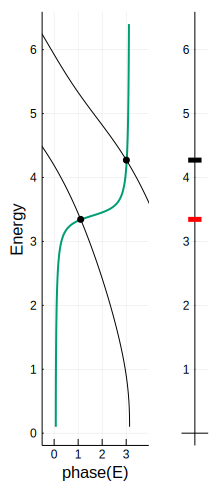

In [151]:
let msq=3.4^2-0.8im
    plot(layout=grid(1,2, widths=(0.8,0.2)),size=(220,500), link=:y)
    plot!(ylab="Energy", xlab="phase(E)",
        xlim=(-0.5,π+0.8), sp=1)
    plot!(delta0.(pval0,msq), pval0, lab="", l=(2,palette(:wong)[3]))
    plot!(calm1, pval0, l=(1,:black), lab="")
    plot!(calm2, pval0, l=(1,:black), lab="")
    #
    imin1 = findmin(abs.(delta0.(pval0,msq)-calm1))[2]
    scatter!([calm1[imin1]], [pval0[imin1]], m=(3,:black), lab="")
    #
    imin2 = findmin(abs.(delta0.(pval0,msq)-calm2))[2]
    scatter!([calm2[imin2]], [pval0[imin2]], m=(3,:black), lab="")
    #
    plot!(sp=2, xaxis=nothing, xlim=(-0.2,0.2), frame=:origin)
    plot!(sp=2, [0.1, -0.1], [pval0[imin1] pval0[imin2]; pval0[imin1] pval0[imin2]], lw=5, lc=[:red :black], lab="")
end

In [152]:
savefig("quantization.pdf")